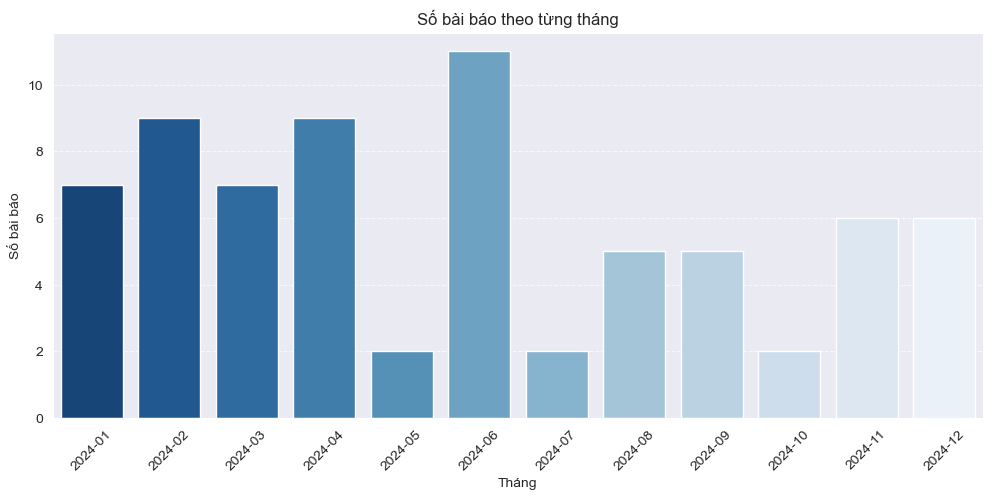

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd
df = pd.read_csv(r'../Can Tho.csv')
# Chuyển đổi cột Date sang định dạng datetime (hỗ trợ nhiều định dạng khác nhau)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')

# Thống kê số bài báo theo từng tháng
df["Year-Month"] = df["Date"].dt.to_period("M")
articles_per_month = df["Year-Month"].value_counts().sort_index()

# Vẽ biểu đồ số bài báo theo tháng
plt.figure(figsize=(12, 5))
sns.barplot(x=articles_per_month.index.astype(str), y=articles_per_month.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Tháng")
plt.ylabel("Số bài báo")
plt.title("Số bài báo theo từng tháng")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


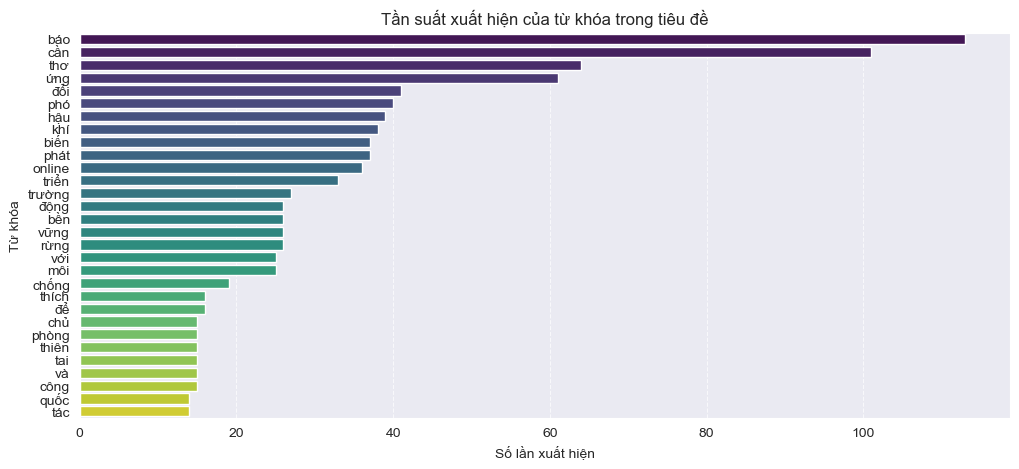

In [6]:
import re

# Gộp tất cả tiêu đề thành một chuỗi duy nhất
all_titles = " ".join(df["Title"]).lower()

# Tách các từ trong tiêu đề (loại bỏ ký tự đặc biệt)
words = re.findall(r'\b\w+\b', all_titles)

# Đếm tần suất xuất hiện của các từ
word_counts = Counter(words)

# Lấy 20 từ xuất hiện nhiều nhất
common_words = word_counts.most_common(30)

# Chuyển thành DataFrame để vẽ biểu đồ
common_words_df = pd.DataFrame(common_words, columns=["Word", "Count"])

# Vẽ biểu đồ tần suất từ khóa trong tiêu đề
plt.figure(figsize=(12, 5))
sns.barplot(y=common_words_df["Word"], x=common_words_df["Count"], palette="viridis")
plt.xlabel("Số lần xuất hiện")
plt.ylabel("Từ khóa")
plt.title("Tần suất xuất hiện của từ khóa trong tiêu đề")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
